<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Use_Case_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/my_data.csv")
df

,Unnamed: 0,tweet_id,external_twitter_id,text,author_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,infos,association_tweet_id,association_scope_id
0,0,1030258,1.684840e+18,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,9.050890e+17,28-07-2023 08:18,en,0,0.000000e+00,{},1030258,10
1,1,1030186,1.684590e+18,"Roche Drops Hemophilia A Candidate, Prepares f...",7.638583e+07,27-07-2023 15:51,en,0,0.000000e+00,{},1030186,10
2,2,1030263,1.684810e+18,Roche moves one Spark hemophilia gene therapy ...,1.481280e+18,28-07-2023 06:34,en,0,0.000000e+00,{},1030263,10
3,3,1030274,1.684720e+18,On #WorldHepatitisDay we put middle finger up ...,1.145270e+18,28-07-2023 00:27,en,0,0.000000e+00,{},1030274,10
4,4,1030288,1.684660e+18,"One of our newest internship programs, launche...",2.112887e+08,27-07-2023 20:13,en,3,1.684630e+18,{},1030288,10
...,...,...,...,...,...,...,...,...,...,...,...,...
29798,29798,1683839551645814784,NaN,"Hear more from Mosi Williams, Pys.D, on the la...",1.479181e+18,2023-07-25 14:00:07,en,0,0.000000e+00,{},1683839551645814784,10
29799,29799,1683938283003183104,NaN,"Was discussing hemophilia with an intelligent,...",2.760856e+08,2023-07-25 20:32:27,en,0,0.000000e+00,{},1683938283003183104,10
29800,29800,1683861079674195968,NaN,The affected &amp; infected have waited decade...,1.104181e+08,2023-07-25 15:25:40,en,3,1.683849e+18,{},1683861079674195968,10
29801,29801,1683918306082955264,NaN,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",1.179873e+18,2023-07-25 19:13:04,en,2,1.683918e+18,{},1683918306082955264,10


In [2]:
columns_to_keep = ['author_id','tweet_id','text','created_at']

new_df = df[columns_to_keep]
new_df

,author_id,tweet_id,text,created_at
0,9.050890e+17,1030258,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,28-07-2023 08:18
1,7.638583e+07,1030186,"Roche Drops Hemophilia A Candidate, Prepares f...",27-07-2023 15:51
2,1.481280e+18,1030263,Roche moves one Spark hemophilia gene therapy ...,28-07-2023 06:34
3,1.145270e+18,1030274,On #WorldHepatitisDay we put middle finger up ...,28-07-2023 00:27
4,2.112887e+08,1030288,"One of our newest internship programs, launche...",27-07-2023 20:13
...,...,...,...,...
29798,1.479181e+18,1683839551645814784,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:07
29799,2.760856e+08,1683938283003183104,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:27
29800,1.104181e+08,1683861079674195968,The affected &amp; infected have waited decade...,2023-07-25 15:25:40
29801,1.179873e+18,1683918306082955264,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:04


In [3]:
new_df.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
!pip install tweet-preprocessor

In [6]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 17.9 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.0 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039284 sha256=0f6810ee45e0705968ab8b0019f02d67b58b88994f99b84716c7bcfa91ac9355
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
data_tweet = new_df.loc[:, ['author_id', 'tweet_id','text', 'created_at']]
data_tweet

,author_id,tweet_id,text,created_at
0,9.050890e+17,1030258,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,28-07-2023 08:18
1,7.638583e+07,1030186,"Roche Drops Hemophilia A Candidate, Prepares f...",27-07-2023 15:51
2,1.481280e+18,1030263,Roche moves one Spark hemophilia gene therapy ...,28-07-2023 06:34
3,1.145270e+18,1030274,On #WorldHepatitisDay we put middle finger up ...,28-07-2023 00:27
4,2.112887e+08,1030288,"One of our newest internship programs, launche...",27-07-2023 20:13
...,...,...,...,...
29798,1.479181e+18,1683839551645814784,"Hear more from Mosi Williams, Pys.D, on the la...",2023-07-25 14:00:07
29799,2.760856e+08,1683938283003183104,"Was discussing hemophilia with an intelligent,...",2023-07-25 20:32:27
29800,1.104181e+08,1683861079674195968,The affected &amp; infected have waited decade...,2023-07-25 15:25:40
29801,1.179873e+18,1683918306082955264,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",2023-07-25 19:13:04


In [9]:
data_tweet.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

In [10]:
data_tweet.shape

(29803, 4)

In [11]:
# Define the helper function to remove hashtag sign from text
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

# Define the main function to clean tweet data
def clean_tweet_data(data_tweet):
    # Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
    p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

    # Apply preprocessor to clean text and remove hashtags
    data_tweet['new_text']  = data_tweet['text'].apply(lambda x: p.clean(str(x)) if pd.notna(x) else '')
    data_tweet['new_text'] = data_tweet['new_text'].apply(lambda x:remove_hashtag_sign(x))

    # Remove extra white spaces, punctuation and apply lower casing
    data_tweet['new_text'] = data_tweet['new_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

    # Return the cleaned DataFrame with both original and cleaned text columns
    return data_tweet[['author_id', 'tweet_id', 'text', 'new_text', 'created_at']]

In [12]:
# Read in the data
data_tweet = pd.read_csv("/content/my_data.csv")

# Clean the text data
cleaned_data_tweet = clean_tweet_data(data_tweet)

# Print out the cleaned DataFrame
print(cleaned_data_tweet.head())

      author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

                                            new_text        created_at  
0  peaks challenge axioactive on the th of august...  28-07-2023 08:18  
1  roche drops hemophilia a candidate prepares fo...  27-07-2023 15:51  
2  roche moves one spark hemophilia gene therapy ...  28-07-2023 06:34  
3  on worldhepatitisday we put middle finger up t...  28-07-2023 00:27  
4  one of our newest internship programs launched...  27-07-2023 20:13  


In [13]:
cleaned_data_tweet

,author_id,tweet_id,text,new_text,created_at
0,9.050890e+17,1030258,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,peaks challenge axioactive on the th of august...,28-07-2023 08:18
1,7.638583e+07,1030186,"Roche Drops Hemophilia A Candidate, Prepares f...",roche drops hemophilia a candidate prepares fo...,27-07-2023 15:51
2,1.481280e+18,1030263,Roche moves one Spark hemophilia gene therapy ...,roche moves one spark hemophilia gene therapy ...,28-07-2023 06:34
3,1.145270e+18,1030274,On #WorldHepatitisDay we put middle finger up ...,on worldhepatitisday we put middle finger up t...,28-07-2023 00:27
4,2.112887e+08,1030288,"One of our newest internship programs, launche...",one of our newest internship programs launched...,27-07-2023 20:13
...,...,...,...,...,...
29798,1.479181e+18,1683839551645814784,"Hear more from Mosi Williams, Pys.D, on the la...",hear more from mosi williams pys d on the late...,2023-07-25 14:00:07
29799,2.760856e+08,1683938283003183104,"Was discussing hemophilia with an intelligent,...",was discussing hemophilia with an intelligent ...,2023-07-25 20:32:27
29800,1.104181e+08,1683861079674195968,The affected &amp; infected have waited decade...,the affected amp infected have waited decades ...,2023-07-25 15:25:40
29801,1.179873e+18,1683918306082955264,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",sickle cell anemia thalassemia hemophilia,2023-07-25 19:13:04


In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
cleaned_data_tweet['new_lemma_text'] = cleaned_data_tweet["new_text"].apply(lemmatize_text)

In [16]:
cleaned_data_tweet

,author_id,tweet_id,text,new_text,created_at,new_lemma_text
0,9.050890e+17,1030258,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,peaks challenge axioactive on the th of august...,28-07-2023 08:18,peak challenge axioactive on the th of august ...
1,7.638583e+07,1030186,"Roche Drops Hemophilia A Candidate, Prepares f...",roche drops hemophilia a candidate prepares fo...,27-07-2023 15:51,roche drop hemophilia a candidate prepares for...
2,1.481280e+18,1030263,Roche moves one Spark hemophilia gene therapy ...,roche moves one spark hemophilia gene therapy ...,28-07-2023 06:34,roche move one spark hemophilia gene therapy i...
3,1.145270e+18,1030274,On #WorldHepatitisDay we put middle finger up ...,on worldhepatitisday we put middle finger up t...,28-07-2023 00:27,on worldhepatitisday we put middle finger up t...
4,2.112887e+08,1030288,"One of our newest internship programs, launche...",one of our newest internship programs launched...,27-07-2023 20:13,one of our newest internship program launched ...
...,...,...,...,...,...,...
29798,1.479181e+18,1683839551645814784,"Hear more from Mosi Williams, Pys.D, on the la...",hear more from mosi williams pys d on the late...,2023-07-25 14:00:07,hear more from mosi williams pys d on the late...
29799,2.760856e+08,1683938283003183104,"Was discussing hemophilia with an intelligent,...",was discussing hemophilia with an intelligent ...,2023-07-25 20:32:27,wa discussing hemophilia with an intelligent e...
29800,1.104181e+08,1683861079674195968,The affected &amp; infected have waited decade...,the affected amp infected have waited decades ...,2023-07-25 15:25:40,the affected amp infected have waited decade f...
29801,1.179873e+18,1683918306082955264,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",sickle cell anemia thalassemia hemophilia,2023-07-25 19:13:04,sickle cell anemia thalassemia hemophilia


In [17]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.1 MB/s eta 0:00:00


In [18]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

UMAP is a dimensionality reduction technique that can be used to reduce high-dimensional data to a lower-dimensional space while preserving the local structure of the data. In this case, you are specifying a UMAP model with 5 dimensions, 15 nearest neighbors, and a cosine distance metric.

In [19]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

HDBSCAN is a clustering algorithm that can be used to group similar data points together based on their distance from each other. In this case, you are specifying an HDBSCAN model with a minimum cluster size of 15, a minimum number of samples of 5, and a Euclidean distance metric. You are also specifying the cluster selection method as 'eom', which stands for "excess of mass" and is a way of selecting the most stable clusters. Finally, you are setting prediction_data=True, which will allow you to later predict which cluster new data points belong to based on the existing clusters.

In [20]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

By specifying stop_words="english", you are telling the vectorizer to remove English stop words such as "the", "and", and "a" from the text data. Removing stop words can help to improve the quality of the analysis results by reducing the number of unimportant or redundant words that are considered.

In [21]:
# #Tokenize topics
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# vectorizer_model = CountVectorizer(stop_words= stopwords)

vectorizer_model = CountVectorizer(stop_words="english")

TfidfTransformer is a class that can be used to transform a count matrix created by CountVectorizer into a term frequency-inverse document frequency (TF-IDF) representation. TF-IDF is a numerical statistic that reflects how important a word is to a document in a collection or corpus, and can be used to help identify important words or topics in text data.

In [22]:
#Create topic representation
ctfidf_model = ClassTfidfTransformer()

The BERTopic class takes several parameters that define the different steps of the BERTopic algorithm:

**embedding_model**: The pre-trained transformer model used to extract embeddings from the text data.

**umap_model**: The UMAP model used to reduce the dimensionality of the embeddings.

**hdbscan_model**: The HDBSCAN model used to cluster the reduced embeddings into topics.

**vectorizer_model**: The vectorizer used to tokenize the text data into a matrix of token counts.

**ctfidf_model**: The transformer used to transform the count matrix into a TF-IDF matrix.

In addition to these parameters, you are also specifying a MaximalMarginalRelevance representation model, which is used to calculate the diversity of the topics. This can help to ensure that the topics are distinct and not redundant.

Finally, you are specifying several additional parameters, such as the number of topics, the n-gram range, and whether to calculate probabilities for the topics. These parameters can be adjusted to fine-tune the performance of the BERTopic algorithm.

In [23]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics=100,
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [24]:
import time

tweet_list is being assigned the result of calling the tolist() method on a column of text data from a pandas DataFrame called cleaned_data_tweet. Based on the name of the column, it seems likely that this is a list of preprocessed and lemmatized tweets.

timestamp is being assigned the result of calling the tolist() method on a column of timestamp data from the same DataFrame. Based on the name of the column, it seems likely that this is a list of the timestamps associated with each tweet in tweet_list.

These lists will likely be used as input to the fit() method of the topic_model object you created earlier, which will generate a set of topics based on the text data and assign each tweet to one or more of these topics.

In [25]:
tweet_list = cleaned_data_tweet.new_lemma_text.tolist()
timestamp=cleaned_data_tweet.created_at.tolist()

In [26]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-02-11 13:47:15,303 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/932 [00:00<?, ?it/s]

2024-02-11 13:47:34,390 - BERTopic - Embedding - Completed ✓
2024-02-11 13:47:34,392 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-11 13:48:41,186 - BERTopic - Dimensionality - Completed ✓
2024-02-11 13:48:41,192 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-11 14:03:14,109 - BERTopic - Cluster - Completed ✓
2024-02-11 14:03:14,111 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-11 14:03:34,172 - BERTopic - Representation - Completed ✓
2024-02-11 14:03:34,173 - BERTopic - Topic reduction - Reducing number of topics
2024-02-11 14:03:37,463 - BERTopic - Topic reduction - Reduced number of topics from 728 to 100


**get_topic_info()** is a method of the BERTopic class that returns a pandas DataFrame that summarizes information about the topics generated by the model. The DataFrame will include columns such as the topic label, the number of documents assigned to the topic, the total frequency of the topic's keywords, and the topic's coherence score.

By calling get_topic_info(), you can examine the characteristics of the topics generated by the model and gain insights into the content of the tweets.

In [27]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4435,-1_haemophilia_hemophilia_blood_day,"[haemophilia, hemophilia, blood, day, treatmen...",[haemophilia is a disorder in which the blood ...
1,0,12968,0_day_hemophilia_haemophilia_care,"[day, hemophilia, haemophilia, care, worldhemo...",[april is world haemophilia day the theme of t...
2,1,1853,1_hemgenix_pfizer_approved_cost,"[hemgenix, pfizer, approved, cost, biotech, ma...",[first gene therapy for hemophilia b csl s hem...
3,2,1317,2_contaminatedblood_hiv_infected_contaminated,"[contaminatedblood, hiv, infected, contaminate...",[parent and child of infected blood victim sho...
4,3,755,3_victoria_rasputin_alexei_inbreeding,"[victoria, rasputin, alexei, inbreeding, tsar,...",[queen victoria wa said to be the queen of eur...
...,...,...,...,...,...
95,94,16,94_judith_cryoprecipitation_vital_treating,"[judith, cryoprecipitation, vital, treating, d...",[this womenshistorymonth join u in celebrating...
96,95,16,95_derbyshire_derby_cook_rsvp,"[derbyshire, derby, cook, rsvp, chance, 17apri...",[have you registered your interest for youth c...
97,96,16,96_tattoo_ear_gauged_unisex,"[tattoo, ear, gauged, unisex, tokyo, seraph, a...",[knifu hemophilia ear tattoo psychostasia gaug...
98,97,15,97_story_stream_talk_inseparable,"[story, stream, talk, inseparable, smashed, po...",[i wrote this on my main twitter and i ll writ...


**topics_list** will be a pandas DataFrame that summarizes information about the topics generated by the model, including the topic label, the number of documents assigned to the topic, the total frequency of the topic's keywords, and the topic's coherence score.

By printing topics_list, you can examine the characteristics of the topics generated by the model and gain insights into the content of the tweets.



In [28]:
topics_list = topic_model.get_topic_info()
topics_list

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4435,-1_haemophilia_hemophilia_blood_day,"[haemophilia, hemophilia, blood, day, treatmen...",[haemophilia is a disorder in which the blood ...
1,0,12968,0_day_hemophilia_haemophilia_care,"[day, hemophilia, haemophilia, care, worldhemo...",[april is world haemophilia day the theme of t...
2,1,1853,1_hemgenix_pfizer_approved_cost,"[hemgenix, pfizer, approved, cost, biotech, ma...",[first gene therapy for hemophilia b csl s hem...
3,2,1317,2_contaminatedblood_hiv_infected_contaminated,"[contaminatedblood, hiv, infected, contaminate...",[parent and child of infected blood victim sho...
4,3,755,3_victoria_rasputin_alexei_inbreeding,"[victoria, rasputin, alexei, inbreeding, tsar,...",[queen victoria wa said to be the queen of eur...
...,...,...,...,...,...
95,94,16,94_judith_cryoprecipitation_vital_treating,"[judith, cryoprecipitation, vital, treating, d...",[this womenshistorymonth join u in celebrating...
96,95,16,95_derbyshire_derby_cook_rsvp,"[derbyshire, derby, cook, rsvp, chance, 17apri...",[have you registered your interest for youth c...
97,96,16,96_tattoo_ear_gauged_unisex,"[tattoo, ear, gauged, unisex, tokyo, seraph, a...",[knifu hemophilia ear tattoo psychostasia gaug...
98,97,15,97_story_stream_talk_inseparable,"[story, stream, talk, inseparable, smashed, po...",[i wrote this on my main twitter and i ll writ...


In [31]:
!pip install cohere tiktoken

In [30]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.7 MB/s eta 0:00:00


In [32]:
import openai

In [33]:
openai.api_type = "azure"
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
openai.api_version = "2023-05-15"

In [34]:
import os
import openai

# Set up your OpenAI API key


openai.api_type = "azure"
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
openai.api_version = "2023-05-15"

def generate_proper_topic_names(topic_names):
    proper_names = []
    for topic_name in topic_names:
        # Prompt to generate a proper topic name
        prompt = f"Generate a proper topic name for '{topic_name}'."

        # Call the OpenAI API to generate a proper topic name
        response = openai.Completion.create(
            engine="GenAI",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.7,
        )

        # Extract the generated topic name from the response
        generated_name = response['choices'][0]['text'].strip()

        # Check if the generated name is empty or null
        if generated_name == "":
            # Use the original topic name as a fallback
            generated_name = topic_name

        proper_names.append(generated_name)

    return proper_names



# Generate proper topic names for the Name column
topic_names =topics_list['Name'].tolist()
topics_list['Proper_Topic_Names'] = generate_proper_topic_names(topic_names)



In [35]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names
0,-1,4435,-1_haemophilia_hemophilia_blood_day,"[haemophilia, hemophilia, blood, day, treatmen...",[haemophilia is a disorder in which the blood ...,World Hemophilia Day: Raising Awareness of Hem...
1,0,12968,0_day_hemophilia_haemophilia_care,"[day, hemophilia, haemophilia, care, worldhemo...",[april is world haemophilia day the theme of t...,0-Day Hemophilia/Haemophilia Care
2,1,1853,1_hemgenix_pfizer_approved_cost,"[hemgenix, pfizer, approved, cost, biotech, ma...",[first gene therapy for hemophilia b csl s hem...,"""Pfizer-Approved Cost of Hemgenix"""
3,2,1317,2_contaminatedblood_hiv_infected_contaminated,"[contaminatedblood, hiv, infected, contaminate...",[parent and child of infected blood victim sho...,HIV Infection from Contaminated Blood
4,3,755,3_victoria_rasputin_alexei_inbreeding,"[victoria, rasputin, alexei, inbreeding, tsar,...",[queen victoria wa said to be the queen of eur...,The Inbreeding of Victoria and Alexei Rasputin
...,...,...,...,...,...,...
95,94,16,94_judith_cryoprecipitation_vital_treating,"[judith, cryoprecipitation, vital, treating, d...",[this womenshistorymonth join u in celebrating...,94 Judith Cryoprecipitation: Vital Treatments ...
96,95,16,95_derbyshire_derby_cook_rsvp,"[derbyshire, derby, cook, rsvp, chance, 17apri...",[have you registered your interest for youth c...,95 Derbyshire Derby Cook-Off RSVP
97,96,16,96_tattoo_ear_gauged_unisex,"[tattoo, ear, gauged, unisex, tokyo, seraph, a...",[knifu hemophilia ear tattoo psychostasia gaug...,"""Unisex Ear Gauging and Tattooing in the '96s"""
98,97,15,97_story_stream_talk_inseparable,"[story, stream, talk, inseparable, smashed, po...",[i wrote this on my main twitter and i ll writ...,"""97 Stories of an Inseparable Stream of Conver..."


In [36]:
topics_list['Proper_Topic_Names'].isnull().sum()

0

In [37]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [38]:
# Load the pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**Here is how this function works:**

The input text is tokenized using the BERT tokenizer and converted to input IDs.

The input IDs are fed into the BERT model to generate output embeddings.

The embeddings are averaged across the sequence length dimension to obtain a single embedding vector for the input text.

The function returns the embedding vector as a Numpy array.

In [39]:
# Define a function that returns the embeddings of a text using BERT
def get_embeddings(text):
    input_ids = torch.tensor(tokenizer.encode(str(text), add_special_tokens=True)).unsqueeze(0)
    outputs = model(input_ids)
    last_hidden_state = outputs[0]
    embeddings = torch.mean(last_hidden_state, dim=1).squeeze().detach().numpy()
    return embeddings


In [40]:
# Apply the get_embeddings function to each topic in the dataframe
topics_list['vector'] = topics_list['Proper_Topic_Names'].apply(lambda x: get_embeddings(x))

In [41]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,vector
0,-1,4435,-1_haemophilia_hemophilia_blood_day,"[haemophilia, hemophilia, blood, day, treatmen...",[haemophilia is a disorder in which the blood ...,World Hemophilia Day: Raising Awareness of Hem...,"[0.09698239, -0.030794555, 0.38160673, -0.0818..."
1,0,12968,0_day_hemophilia_haemophilia_care,"[day, hemophilia, haemophilia, care, worldhemo...",[april is world haemophilia day the theme of t...,0-Day Hemophilia/Haemophilia Care,"[0.011813428, 0.10242531, 0.27219382, -0.15644..."
2,1,1853,1_hemgenix_pfizer_approved_cost,"[hemgenix, pfizer, approved, cost, biotech, ma...",[first gene therapy for hemophilia b csl s hem...,"""Pfizer-Approved Cost of Hemgenix""","[-0.09610399, -0.5057638, 0.2077693, -0.105492..."
3,2,1317,2_contaminatedblood_hiv_infected_contaminated,"[contaminatedblood, hiv, infected, contaminate...",[parent and child of infected blood victim sho...,HIV Infection from Contaminated Blood,"[0.527703, 0.2954157, -0.33377615, -0.01038476..."
4,3,755,3_victoria_rasputin_alexei_inbreeding,"[victoria, rasputin, alexei, inbreeding, tsar,...",[queen victoria wa said to be the queen of eur...,The Inbreeding of Victoria and Alexei Rasputin,"[0.28158048, -0.43454856, -0.067383066, -0.295..."
...,...,...,...,...,...,...,...
95,94,16,94_judith_cryoprecipitation_vital_treating,"[judith, cryoprecipitation, vital, treating, d...",[this womenshistorymonth join u in celebrating...,94 Judith Cryoprecipitation: Vital Treatments ...,"[-0.09891881, 0.0030615628, -0.19092004, -0.09..."
96,95,16,95_derbyshire_derby_cook_rsvp,"[derbyshire, derby, cook, rsvp, chance, 17apri...",[have you registered your interest for youth c...,95 Derbyshire Derby Cook-Off RSVP,"[-0.019264368, -0.42401183, 0.085964136, -0.35..."
97,96,16,96_tattoo_ear_gauged_unisex,"[tattoo, ear, gauged, unisex, tokyo, seraph, a...",[knifu hemophilia ear tattoo psychostasia gaug...,"""Unisex Ear Gauging and Tattooing in the '96s""","[0.15645826, -0.2796132, -0.0140719665, -0.133..."
98,97,15,97_story_stream_talk_inseparable,"[story, stream, talk, inseparable, smashed, po...",[i wrote this on my main twitter and i ll writ...,"""97 Stories of an Inseparable Stream of Conver...","[-0.0052635157, -0.14212178, 0.3046582, -0.030..."


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [43]:
# Apply K-means clustering to the vectors
kmeans = KMeans(n_clusters=10, random_state=0).fit(list(topics_list['vector']))

In [44]:
# Assign each topic to its closest cluster
topics_list['cluster'] = pairwise_distances_argmin_min(list(topics_list['vector']), kmeans.cluster_centers_)[0]

In [45]:
# Get the counts of topics in each cluster
cluster_counts = topics_list['cluster'].value_counts()

In [46]:
cluster_counts

3    18
7    15
8    15
1    13
9    13
4    12
2     5
0     5
6     3
5     1
Name: cluster, dtype: int64

In [47]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,vector,cluster
0,-1,4435,-1_haemophilia_hemophilia_blood_day,"[haemophilia, hemophilia, blood, day, treatmen...",[haemophilia is a disorder in which the blood ...,World Hemophilia Day: Raising Awareness of Hem...,"[0.09698239, -0.030794555, 0.38160673, -0.0818...",7
1,0,12968,0_day_hemophilia_haemophilia_care,"[day, hemophilia, haemophilia, care, worldhemo...",[april is world haemophilia day the theme of t...,0-Day Hemophilia/Haemophilia Care,"[0.011813428, 0.10242531, 0.27219382, -0.15644...",7
2,1,1853,1_hemgenix_pfizer_approved_cost,"[hemgenix, pfizer, approved, cost, biotech, ma...",[first gene therapy for hemophilia b csl s hem...,"""Pfizer-Approved Cost of Hemgenix""","[-0.09610399, -0.5057638, 0.2077693, -0.105492...",1
3,2,1317,2_contaminatedblood_hiv_infected_contaminated,"[contaminatedblood, hiv, infected, contaminate...",[parent and child of infected blood victim sho...,HIV Infection from Contaminated Blood,"[0.527703, 0.2954157, -0.33377615, -0.01038476...",7
4,3,755,3_victoria_rasputin_alexei_inbreeding,"[victoria, rasputin, alexei, inbreeding, tsar,...",[queen victoria wa said to be the queen of eur...,The Inbreeding of Victoria and Alexei Rasputin,"[0.28158048, -0.43454856, -0.067383066, -0.295...",9
...,...,...,...,...,...,...,...,...
95,94,16,94_judith_cryoprecipitation_vital_treating,"[judith, cryoprecipitation, vital, treating, d...",[this womenshistorymonth join u in celebrating...,94 Judith Cryoprecipitation: Vital Treatments ...,"[-0.09891881, 0.0030615628, -0.19092004, -0.09...",1
96,95,16,95_derbyshire_derby_cook_rsvp,"[derbyshire, derby, cook, rsvp, chance, 17apri...",[have you registered your interest for youth c...,95 Derbyshire Derby Cook-Off RSVP,"[-0.019264368, -0.42401183, 0.085964136, -0.35...",8
97,96,16,96_tattoo_ear_gauged_unisex,"[tattoo, ear, gauged, unisex, tokyo, seraph, a...",[knifu hemophilia ear tattoo psychostasia gaug...,"""Unisex Ear Gauging and Tattooing in the '96s""","[0.15645826, -0.2796132, -0.0140719665, -0.133...",1
98,97,15,97_story_stream_talk_inseparable,"[story, stream, talk, inseparable, smashed, po...",[i wrote this on my main twitter and i ll writ...,"""97 Stories of an Inseparable Stream of Conver...","[-0.0052635157, -0.14212178, 0.3046582, -0.030...",9


In [48]:
# Create a dictionary of clusters and the topics in each cluster
cluster_dict = {}
for i in range(10):
    cluster_dict[i] = list(topics_list[topics_list['cluster']==i]['Proper_Topic_Names'])

# Print the topics in each cluster
for i in range(10):
    print("Cluster {}:".format(i))
    for topic in cluster_dict[i]:
        print("- {}".format(topic))

Cluster 0:
- '43 Regulatory Officer Executive Position'
- '63 MP Compensation Protest Inquiry
- 'Ethereum 69 TL Retweet Bot'
- MCKeen Apology for Defamation of '73
- '89 Cartoon: Stimulating Magical Thinking
Cluster 1:
- "Pfizer-Approved Cost of Hemgenix"
- 'The Impact of Von Willebrand Disease on the Hemophilia Community: A Perspective from 14 Columnists'.
- "Webinar: Curing Hepatitis C with a 28-Day Liver Detox"
- "Exploring Emerging Therapies for Contact Hemobulimia: A 40-Pulse Study"
- Prayer for Dogs with Lupus: A Case Study of 42 Dogs
- Oxidative Conduction Microwave Heating in Havana: 52 Case Studies
- "Psychosocial Support for Women Escaping Crisis: A Case Study of 54 Women"
- "Effect of 56-Inch Physiotherapy Mattress Massage on Discomfort Relief"
- Appreciating Haiku Poetry in 59 Days
- Gynecological Surgery and Cardiac Care: How Your Blood Saves Lives
- "Ablation of Ovarian Cysts During Pregnancy: A Study of 71 Cases"
- 94 Judith Cryoprecipitation: Vital Treatments for Health

In [49]:
import plotly.express as px
# Create a pie chart of the cluster counts using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# Show the pie chart
fig.show()

In [75]:
import openai
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sentence_transformers import SentenceTransformer
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min

In [88]:


# Set up OpenAI API key
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"

# Load BERT model for embeddings
bert_model = SentenceTransformer('bert-base-uncased')

# Define the similarity threshold
similarity_threshold = 0.5



# Define function to clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # Remove URLs
    text = re.sub(r"@[^\s]+", "", text) # Remove mentions
    text = re.sub(r"#([^\s]+)", r"\1", text) # Remove hashtag symbol
    text = re.sub(r"[^a-zA-Z\s]", "", text) # Remove non-alphabetic characters
    text = text.lower().strip() # Lowercase and remove leading/trailing whitespace
    return text

# Define function to generate proper topic name using OpenAI API
def generate_topic_name(text):
    response = openai.Completion.create(
        engine="GenAI",
        prompt=f"Generate a proper name for the following topic:\n\n{clean_text(text)}\n\nName:",
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.5
    )
    topic_name = response.choices[0].text.strip()
    return topic_name

# Define function to generate BERT embeddings for text
def generate_embeddings(text):
    embeddings = bert_model.encode(text)
    return embeddings

# Define function to assign tweet to its closest cluster
def assign_to_cluster(tweet_embeddings):
    cluster_distances = pairwise_distances(tweet_embeddings, cluster_centroids)
    closest_cluster_indices = cluster_distances.argmin(axis=1)
    return closest_cluster_indices[0]

# Define function to add tweet to its corresponding cluster or "other" cluster
def add_to_cluster(clean_tweet, topic_name):
    closest_cluster_index = assign_to_cluster(generate_embeddings([topic_name]))
    if closest_cluster_index in cluster_counts:
        # Add the tweet to the corresponding cluster
        cluster_counts[closest_cluster_index]["count"] += 1
        cluster_counts[closest_cluster_index]["tweets"].append({"text": clean_tweet, "topic": topic_name})
        topics_list.loc[len(topics_list)] = [clean_tweet, topic_name, closest_cluster_index]
    else:
        # Create a new "other" cluster
        cluster_counts["other"]["count"] += 1
        cluster_counts["other"]["tweets"].append({"text": clean_tweet, "topic": topic_name})
        topics_list.loc[len(topics_list)] = [clean_tweet, topic_name, "other"]
        # Recalculate the cluster centroids
        kmeans.fit(generate_embeddings([tweet["topic"] for tweet in cluster_counts[closest_cluster_index]["tweets"]]))
        cluster_centroids = kmeans.cluster_centers_

# Define function to update cluster centroids and counts
def update_clusters():
    global cluster_centroids
    for cluster_index in cluster_counts:
        if cluster_index != "other":
            cluster_embeddings = generate_embeddings([tweet["topic"] for tweet in cluster_counts[cluster_index]["tweets"]])
            cluster_centroids[cluster_index] = cluster_embeddings.mean(axis=0)

In [ ]:
import matplotlib.pyplot as plt

def generate_pie_chart():
    # Get the count of tweets in each cluster
    cluster_tweet_counts = [cluster_counts[cluster]["count"] for cluster in cluster_counts]
    # Get the labels for each cluster
    cluster_labels = [f"Cluster {cluster}" if cluster in cluster_counts else "Other" for cluster in range(num_clusters)]
    # Add the "Other" cluster count to the end of the list
    cluster_tweet_counts.append(cluster_counts["other"]["count"])
    # Add the "Other" label to the end of the list
    cluster_labels.append("Other")
    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(cluster_tweet_counts, labels=cluster_labels, autopct="%1.1f%%")
    ax.set_title("Cluster Distribution")
    plt.show()

In [89]:
# Define function to initialize the cluster centroids
def initialize_clusters():
    global cluster_centroids
    cluster_centroids = kmeans.cluster_centers_

# Call the initialize_clusters function to initialize the cluster centroids
initialize_clusters()

def assign_cluster(new_tweet):
    # Clean up the tweet text
    clean_tweet = clean_text(new_tweet)
    # Generate the proper topic name using OpenAI API
    topic_name = generate_topic_name(clean_tweet)
    # Generate the BERT embedding for the tweet
    tweet_embeddings = generate_embeddings([clean_tweet])
    # Find the closest cluster centroid and its index
    closest_cluster_index, closest_cluster_distance = pairwise_distances_argmin_min(tweet_embeddings, cluster_centroids)
    # Check if the tweet is similar enough to the cluster centroid
    if closest_cluster_distance[0] < similarity_threshold:
        # Add the tweet to the corresponding cluster
        cluster_counts[closest_cluster_index]["count"] += 1
        cluster_counts[closest_cluster_index]["tweets"].append({"text": clean_tweet, "topic": topic_name})
        # Create a new row in the dataframe for the new tweet
        new_row = {"proper_topic_name": topic_name, "vector": tweet_embeddings[0], "cluster": closest_cluster_index}
        df = df.append(new_row, ignore_index=True)
    else:
        # Create a new "other" cluster
        cluster_counts["other"]["count"] += 1
        cluster_counts["other"]["tweets"].append({"text": clean_tweet, "topic": topic_name})
        # Create a new row in the dataframe for the new tweet
        new_row = {"proper_topic_name": topic_name, "vector": tweet_embeddings[0], "cluster": "other"}
        topic_list = topic_list.append(new_row, ignore_index=True)
        # Recalculate the cluster centroids
        kmeans.fit(generate_embeddings([tweet["topic"] for tweet in cluster_counts[closest_cluster_index]["tweets"]]))
        cluster_centroids = kmeans.cluster_centers_
    # Create a new pie chart of the updated cluster distribution
    generate_pie_chart()
    # Print the assigned cluster index
    if closest_cluster_index in cluster_counts:
        print(f"The tweet '{new_tweet}' has been assigned to Cluster {closest_cluster_index}.")
    else:
        print(f"The tweet '{new_tweet}' has been assigned to the 'Other' cluster.")

# Initialize the cluster centroids
initialize_clusters()

# Call the assign_cluster function with a new tweet
new_tweet = "Just had the worst pizza ever at Joe's Pizza on 5th Ave!"
assign_cluster(new_tweet)

UnboundLocalError: local variable 'cluster_centroids' referenced before assignment

In [50]:
import plotly.express as px

# Create a bar chart of the cluster counts using Plotly
fig = px.bar(
    x=cluster_counts.index,
    y=cluster_counts.values,
    title="Cluster Distribution"
)

# Show the bar chart
fig.show()

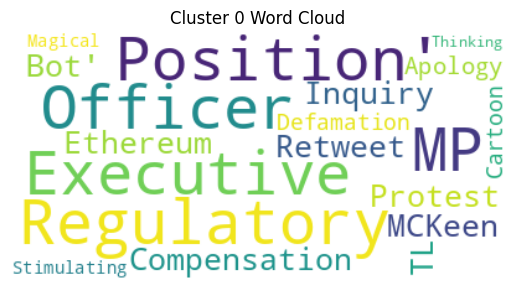

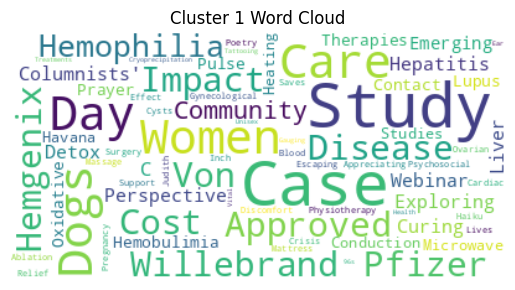

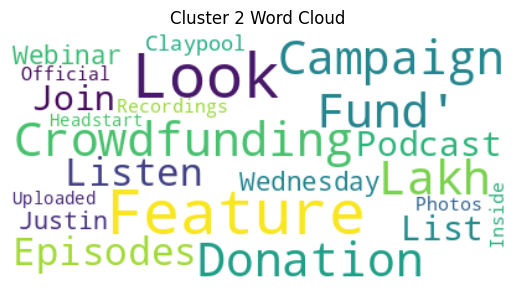

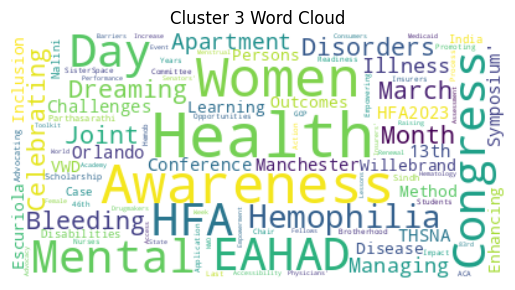

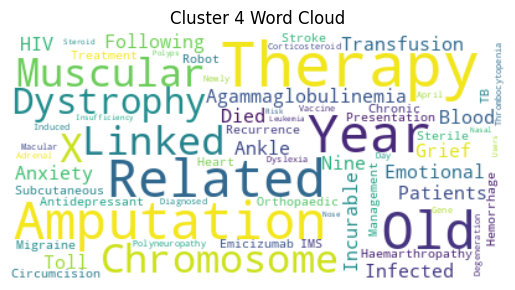

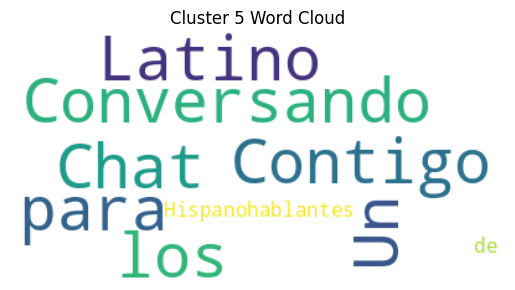

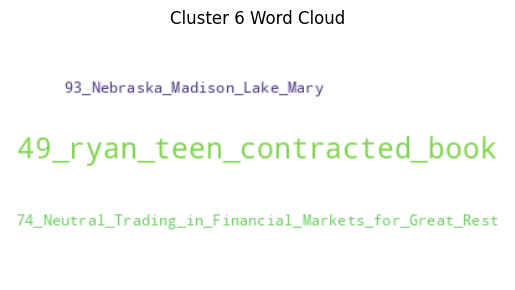

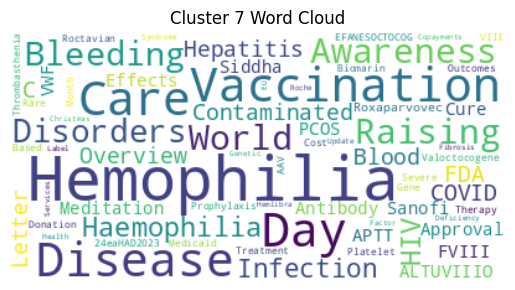

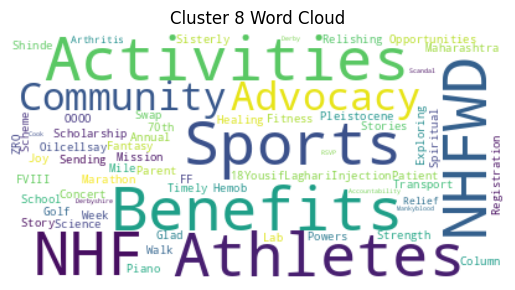

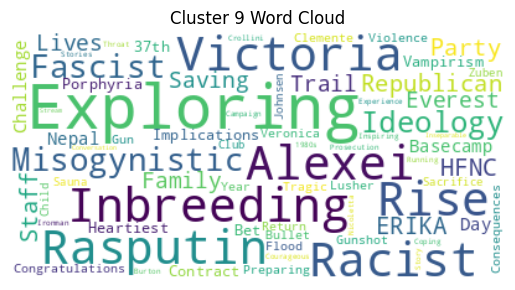

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for each cluster
for cluster_id in range(10):
    # Get the topics in this cluster
    cluster_topics = topics_list[topics_list['cluster'] == cluster_id]['Proper_Topic_Names'].tolist()
    # Combine the topics into a single string
    cluster_text = ' '.join(cluster_topics)
    # Create the word cloud
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cluster_text)
    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster_id} Word Cloud")
    plt.show()


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Get the topics that belong to the "other" cluster
#other_topics = topics_list[topics_list['cluster'] == cluster_counts.index[-1]]['Proper_Topic_Names']

In [ ]:
cluster_counts = {}
for i in range(len(kmeans.cluster_centers_)):
    cluster_counts[i] = 0
cluster_counts['Other'] = 0

In [64]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
def assign_cluster(new_tweet):
    # Generate the proper topic name using OpenAI GPT-3
    prompt = f"Generate a proper topic name for '{new_tweet}'."
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.7,
    )
    topic_name = response['choices'][0]['text'].strip()
    # Generate the BERT embedding for the topic name
    topic_vector = get_embeddings(topic_name)
    # Assign the topic to its closest cluster
    closest_cluster = pairwise_distances_argmin_min([topic_vector], kmeans.cluster_centers_)[0][0]
    if closest_cluster == len(cluster_counts): # new tweet belongs to the Other category
        cluster_counts['Other'] += 1
    else: # new tweet belongs to an existing cluster
        cluster_counts[closest_cluster] += 1
    # Create a new pie chart of the updated cluster distribution
    updated_cluster_counts = pd.Series(cluster_counts)
    updated_cluster_counts.index = ["Cluster " + str(i) for i in range(len(updated_cluster_counts) - 1)] + ["Other"]
    fig = px.pie(
        names=updated_cluster_counts.index,
        values=updated_cluster_counts.values,
        title="Cluster Distribution"
    )
    # Show the pie chart
    fig.show()


In [61]:
import plotly.graph_objects as go

# Initialize an empty heatmap
heatmap_data = []

# Iterate over each cluster
for cluster_id in range(10):
    # Get the topics in this cluster
    cluster_topics = topics_list[topics_list['cluster'] == cluster_id]['Proper_Topic_Names'].tolist()
    # Initialize a row of similarity scores
    similarity_row = []
    # Iterate over each topic in the cluster
    for topic in cluster_topics:
        # Get the embedding vector for this topic
        topic_vector = topics_list[topics_list['Proper_Topic_Names'] == topic]['vector'].values[0]
        # Compute the pairwise cosine similarities between this topic and all other topics in the cluster
        similarity_scores = cosine_similarity(topic_vector.reshape(1, -1), list(topics_list[topics_list['cluster'] == cluster_id]['vector']))
        # Append the maximum similarity score to the row
        similarity_row.append(similarity_scores.max())
    # Append the row to the heatmap data
    heatmap_data.append(similarity_row)

# Create the heatmap figure
fig = go.Figure(data=go.Heatmap(
        z=heatmap_data,
        x=[f'Topic {i}' for i in range(len(heatmap_data[0]))],
        y=[f'Cluster {i}' for i in range(len(heatmap_data))],
        colorscale='Viridis'))

# Set the title and axis labels
fig.update_layout(
    title='Topic Similarity Heatmap',
    xaxis_title='Topic ID',
    yaxis_title='Cluster ID'
)

# Show the heatmap
fig.show()

This code generates the topic name for the new tweet using OpenAI GPT-3, generates the BERT embedding for the topic name, assigns the topic to its closest cluster center, updates the cluster_counts dictionary with the count for the new tweet's cluster or the "Other" category, creates a new pie chart of the updated cluster distribution, and shows the pie chart.

When a new tweet is assigned to an existing cluster, the weightages of the existing clusters will change, and you'll be able to see the change in the pie chart. When a new tweet is assigned to the "Other" category, a new slice will be added to the pie chart for the "Other" category.

